<a href="https://colab.research.google.com/github/vladgap/Various/blob/main/SVR_function_approx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn import preprocessing
import matplotlib.pyplot as plt
import skimage.io as sio

In [9]:
from sklearn.svm import SVR

# 1

In [43]:
def func(x):
    y = x**2+1
    return y

In [44]:
x=np.linspace(-1,2,11)
data1=np.array([
               x,
               func(x)
               ]).T
X1=data1[:,[0]]
T1=data1[:,[1]]

In [45]:
scaler_X1 = preprocessing.StandardScaler().fit(X1)
scaler_T1 = preprocessing.StandardScaler().fit(T1)

# scaler_X1.mean_, scaler_X1.scale_ = 0, 1 # disable scaling
# scaler_T1.mean_, scaler_T1.scale_ = 0, 1 # disable scaling

scaler_data1 = [scaler_X1.mean_, scaler_X1.scale_, scaler_T1.mean_, scaler_T1.scale_]
print('scaler X -- mean, stdev:  ',scaler_data1[0], scaler_data1[1])
print('scaler T -- mean, stdev:  ',scaler_data1[2], scaler_data1[3])

X_sc1 = scaler_X1.transform(X1)
T_sc1 = scaler_T1.transform(T1)
X_sc1[0:3]

scaler X -- mean, stdev:   [0.5] [0.9486833]
scaler T -- mean, stdev:   [2.15] [1.23765908]


array([[-1.58113883],
       [-1.26491106],
       [-0.9486833 ]])

In [46]:
# T_sc1.ravel()

In [47]:
# T_sc1.ravel().reshape(-1,1)

## 1_1

In [48]:
svr1=SVR(kernel='rbf')
svr1.fit(X_sc1,T_sc1.ravel())
predics1=scaler_T1.inverse_transform(svr1.predict(X_sc1).reshape(-1,1))
# predics1

(array([1., 0., 0., 0., 2., 0., 0., 4., 1., 3.]),
 array([-17.86527736, -14.8517629 , -11.83824845,  -8.82473399,
         -5.81121954,  -2.79770508,   0.21580938,   3.22932383,
          6.24283829,   9.25635275,  12.2698672 ]),
 <BarContainer object of 10 artists>)

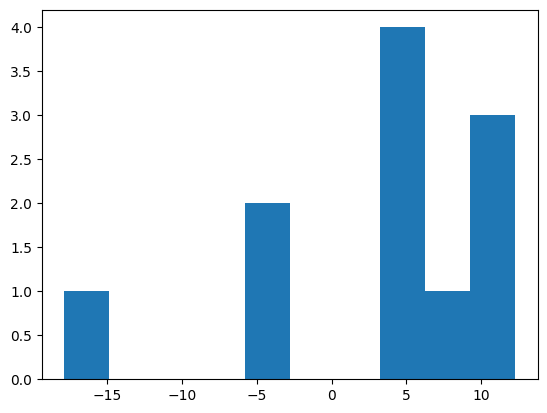

In [49]:
errors1=(predics1-T1)/T1*100
plt.hist(errors1[:,0]) # division by 0

In [53]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=T1[:,0], y=predics1[:,0], mode='markers', marker_size=4, name='predics', marker_color='black'),secondary_y=False)
fig.add_trace(go.Scatter(x=T1[:,0], y=T1[:,0], mode='lines', line_color='red', line_width=0.2, showlegend=False),secondary_y=False)
fig.add_trace(go.Scatter(x=T1[:,0], y=errors1[:,0], mode='markers', marker_size=4, name='errors', marker_color='orange'),secondary_y=True)

fig.update_xaxes(title_text="data")

# Set y-axes titles
fig.update_yaxes(title_text="predics", secondary_y=False)
fig.update_yaxes(title_text="% error", range=[-20, 20], secondary_y=True, showgrid=False, tick0=-5, dtick=2)

fig.show()

In [56]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=X1[:,0], y=T1[:,0], mode='markers', marker_color='blue', name='data'),secondary_y=False)
fig.add_trace(go.Scatter(x=X1[:,0], y=errors1[:,0], mode='markers', marker_size=4, marker_color='orange', name='errors'),secondary_y=True)

X_mean, X_wigth = X1[:,0].mean(), X1[:,0].max()-X1[:,0].mean()
X_extended=np.linspace(X_mean-2*X_wigth, X_mean+2*X_wigth, 51)

fig.add_trace(go.Scatter(x=X_extended, y=scaler_T1.inverse_transform(svr1.predict(scaler_X1.transform(X_extended.reshape(51,1))).reshape(-1,1))[:,0], mode='markers', marker_size=3, name='extenden prediction'),secondary_y=False)
fig.add_trace(go.Scatter(x=X1[:,0], y=predics1[:,0], mode='markers', marker_color='black', name='prediction'),secondary_y=False)

fig.update_xaxes(title_text="x_axis")

# Set y-axes titles
fig.update_yaxes(title_text="data, predics", secondary_y=False)
fig.update_yaxes(title_text="% error", range=[-20, 20], secondary_y=True, showgrid=False, tick0=-5, dtick=2)

fig.show()

## 1_2

In [69]:
svr1_2=SVR(kernel='poly')
svr1_2.fit(X_sc1,T_sc1.ravel())
predics1_2=scaler_T1.inverse_transform(svr1_2.predict(X_sc1).reshape(-1,1))
# predics1_2

In [70]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=X1[:,0], y=T1[:,0], mode='markers', marker_color='blue', name='data'),secondary_y=False)
# fig.add_trace(go.Scatter(x=X1[:,0], y=errors1[:,0], mode='markers', marker_size=4, marker_color='orange', name='errors'),secondary_y=True)

X_mean, X_wigth = X1[:,0].mean(), X1[:,0].max()-X1[:,0].mean()
X_extended=np.linspace(X_mean-2*X_wigth, X_mean+2*X_wigth, 51)

fig.add_trace(go.Scatter(x=X_extended, y=scaler_T1.inverse_transform(svr1_2.predict(scaler_X1.transform(X_extended.reshape(-1,1))).reshape(-1,1))[:,0], mode='markers', marker_size=3, name='extenden prediction'),secondary_y=False)
fig.add_trace(go.Scatter(x=X1[:,0], y=predics1_2[:,0], mode='markers', marker_color='black', name='prediction'),secondary_y=False)

fig.update_xaxes(title_text="x_axis")

# Set y-axes titles
fig.update_yaxes(title_text="data, predics", secondary_y=False)
fig.update_yaxes(title_text="% error", range=[-20, 20], secondary_y=True, showgrid=False, tick0=-5, dtick=2)

fig.show()

# 2

In [71]:
data2=[
[0.32,	0.99,	0.77,	0.69,	0.04,	0.37,	0.25,	0.44,	0.42,	0.64,	0.8,],
[0.4,	0.23,	0.22,	0.57,	0.78,	0.69,	0.2,	0.45,	0.17,	0.98,	0.96,],
[4.952768,	5.924299,	5.412533,	5.214509,	4.844064,	4.912653,	4.975625,	4.995184,	5.040088,	5.066144,	5.32,],
]
data2=np.array(data2).T
X2=data2[:,[0,1]]
T2=data2[:,[2]]

In [72]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2 = preprocessing.StandardScaler().fit(T2)

scaler_data2 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2.mean_, scaler_T2.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2[0], scaler_data2[1])
print('scaler T -- mean, stdev:  ',scaler_data2[2], scaler_data2[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2 = scaler_T2.transform(T2)
X_sc2[0:3]

scaler X -- mean, stdev:   [0.52090909 0.51363636] [0.26752925 0.28952226]
scaler T -- mean, stdev:   [5.15071518] [0.29600926]


array([[-0.7509799 , -0.39249612],
       [ 1.75341913, -0.97967031],
       [ 0.93107915, -1.01420996]])

In [154]:
# svr2=SVR(kernel='rbf', gamma=.1)
svr2=SVR(kernel='sigmoid')
# svr2=SVR(kernel='poly', degree=2)
svr2.fit(X_sc2,T_sc2.ravel())
predics2=scaler_T2.inverse_transform(svr2.predict(X_sc2).reshape(-1,1))
# predics2

In [155]:
svr2.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [156]:
x_mesh, y_mesh = np.linspace(-1, 2, 31), np.linspace(-1, 2, 31)
# x_mesh, y_mesh = np.arange(-1, 2, 0.1), np.arange(-1, 2, 0.1)
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)
x_mesh = x_mesh.flatten().reshape(31*31,1)
y_mesh = y_mesh.flatten().reshape(31*31,1)
mesh2=np.concatenate((x_mesh, y_mesh), axis=1)
# x_mesh[:5]
mesh_predics2=scaler_T2.inverse_transform(svr2.predict(scaler_X2.transform(mesh2)).reshape(-1,1))

In [158]:
fig=go.Figure()
fig.add_trace(go.Scatter3d(x=data2[:,0], y=data2[:,1], z=data2[:,2], mode='markers', name='data'))
fig.add_trace(go.Scatter3d(x=data2[:,0], y=data2[:,1], z=predics2[:,0], mode='markers', name='predics'))
fig.add_trace(go.Scatter3d(x=x_mesh[:,0], y=y_mesh[:,0], z=mesh_predics2[:,0], mode='markers', marker_size=2, name='mesh-predics'))
x=np.linspace(0, 1, 11)
y=np.linspace(0, 1, 11)
x, y = np.meshgrid(x,y)
z=x**3-.2*y+5
fig.add_trace(go.Surface(x=x, y=y, z=z, colorbar_x=0, opacity=0.5, showlegend=True, name='data surface'))
fig.update_scenes(camera_projection_type="orthographic")

fig.show()